In [4]:
from sklearn.datasets import fetch_openml

In [5]:
mnist=fetch_openml("mnist_784",version=1)

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X,y=mnist["data"],mnist["target"]

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
X=X.to_numpy()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
y=y.to_numpy()
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [13]:
some_digit=X[0]

In [14]:
some_digit_image=some_digit.reshape(28,28)

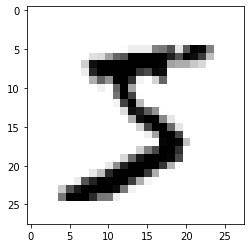

In [15]:
plt.imshow(some_digit_image,cmap="binary")

In [16]:
y[0]

'5'

In [17]:
y=y.astype(np.int8)

In [18]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [19]:
y_train_5=y_train==5

In [20]:
y_test_5=y_test==5

In [21]:
from sklearn.linear_model import SGDClassifier

In [22]:
sgd_clf=SGDClassifier(random_state=42)

In [23]:
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [24]:
sgd_clf.predict([some_digit])

array([ True])

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [27]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    
    def fit(sef,X,y=none):
        pass

NameError: name 'none' is not defined

In [28]:
from sklearn.model_selection import cross_val_predict

In [29]:
y_train_predict=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [30]:
y_train_predict

array([ True, False, False, ...,  True, False, False])

In [31]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_train_5,y_train_predict)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [32]:
y_train_perfect_predictions=y_train_5

In [33]:
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [34]:
from sklearn.metrics import precision_score ,recall_score

In [35]:
precision_score(y_train_5,y_train_predict)

0.8370879772350012

In [36]:
recall_score(y_train_5,y_train_predict)

0.6511713705958311

In [37]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_predict)

0.7325171197343846

In [38]:
from sklearn.svm import SVC

In [39]:
svm_clf=SVC()

In [40]:
svm_clf.fit(X_train,y_train)

SVC()

In [41]:
svm_clf.predict([some_digit])

array([5], dtype=int8)

In [42]:
some_digit_scores=svm_clf.decision_function([some_digit])

In [43]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [44]:
np.argmax(some_digit_scores)

5

In [45]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [46]:
sgd_clf.predict([some_digit])

array([3], dtype=int8)

In [47]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler

In [50]:
X_trained_scaler=scaler.fit_transform(X=X_train.astype(np.float64))

TypeError: fit_transform() missing 1 required positional argument: 'self'

In [51]:
y_trained_pred=cross_val_predict(sgd_clf,X_train,y_train,cv=3)

In [52]:
y_trained_pred

array([5, 0, 4, ..., 5, 6, 8], dtype=int8)

In [53]:
conf_mx=confusion_matrix(y_train,y_trained_pred)

In [54]:
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]],
      dtype=int64)

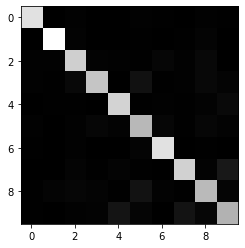

In [55]:
plt.imshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [56]:
row_sums=conf_mx.sum(axis=1,keepdims=True)

In [57]:
norm_con_mx=conf_mx/row_sums

In [58]:
np.fill_diagonal(norm_con_mx,0)

In [59]:
norm_con_mx.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

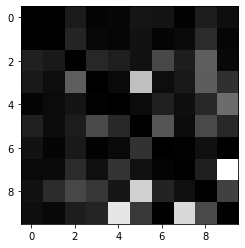

In [60]:
plt.imshow(norm_con_mx,cmap=plt.cm.gray)

In [62]:
import numpy as np

In [67]:
X=2*np.random.rand(100,1)

In [68]:
y=4+3*X+np.random.randn(100,1)

In [71]:
X_b=np.c_[np.ones((100,1)),X]

In [74]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [75]:
theta_best

array([[3.45848731],
       [3.45643566]])

implementation of stochastic gradient descent

In [98]:
m=100
n_epocs=50
t0,t1=5,50

In [99]:
def learning_scheduling(t):
    return t0/t+t1

In [100]:
theta=np.random.randn(2,1)

In [103]:
theta

array([[nan],
       [nan]])

In [101]:
for epocs in range(n_epocs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_scheduling(epocs*m+1)
        theta=theta-eta*gradients

<ipython-input-101-0eb39436e221>:8: RuntimeWarning: overflow encountered in multiply
  theta=theta-eta*gradients
<ipython-input-101-0eb39436e221>:8: RuntimeWarning: invalid value encountered in subtract
  theta=theta-eta*gradients


In [102]:
theta

array([[nan],
       [nan]])

Implementation of Batch Gradient Descent

In [104]:
eta=0.1
n_iterations=1000
m=100

In [106]:
theta=np.random.randn(2,1)

In [107]:
for i in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients
    

In [108]:
theta

array([[3.45848731],
       [3.45643566]])

Linear Reggresion using SKlearn

In [110]:
from sklearn.linear_model import SGDRegressor

In [113]:
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [114]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.51364734]), array([3.53353795]))

|

Polynomial Regression

|

In [117]:
m=100
x=6*np.random.randn(m,1)-3
y=0.5*x**2+X+2+np.random.randn(m,1)

In [124]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_features.fit_transform(X)

In [125]:
x[0]

array([-3.60466482])

In [126]:
x_poly[0]

array([ 4.78997401, 22.94385102])

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
lin_reg=LinearRegression()

In [131]:
lin_reg.fit(x_poly,y)

LinearRegression()

In [132]:
lin_reg.intercept_,lin_reg.coef_

(array([24.58863304]), array([[1.19964334e+00, 1.17853382e-03]]))

In [143]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [149]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_error,val_error=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val[:m])
        train_error.append(mean_squared_error(y_train[:m],y_train_predict))
        val_error.append(mean_squared_error(y_val[:m],y_val_predict))
    plt.plot(np.sqrt(train_error),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_error),"b-",linewidth=3,label="val")

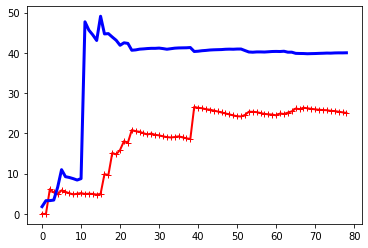

In [150]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,x,y)